<a href="https://colab.research.google.com/github/psedocode01/Final-Team10/blob/main/%ED%8C%8C%EC%9D%B4%EB%84%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_9%EC%9B%94_18%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm

In [ ]:
DATA_PATH = "movies_ratings_post2020.csv"
df = pd.read_csv(DATA_PATH)

### Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨

In [ ]:
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("movies_ratings_post2020.csv")

# Í∞úÎ¥âÏó∞ÎèÑ Ï∂îÏ∂ú
df["release_year"] = df["title"].str.extract(r"\((\d{4})\)").astype(float)

# timestamp ‚Üí datetime
df["rating_dt"] = pd.to_datetime(df["timestamp"], unit="s", errors="coerce")
df["rating_year"] = df["rating_dt"].dt.year

# Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ
df["age_at_rating"] = df["rating_year"] - df["release_year"]
df = df[(df["age_at_rating"] >= 0) & df["age_at_rating"].notna()]


### Ïû•Î•¥ ÌïÑÌÑ∞ÎßÅ

In [ ]:
# Î∂ÑÏÑùÌï† Ïû•Î•¥
target_genres = ["Drama", "Action", "Comedy", "Thriller", "Adventure", "Sci-Fi", "Crime"]

# Ïòà: Drama ÌïÑÌÑ∞ÎßÅ
genre = "Drama"
sub = df[df["genres"].str.contains(genre, na=False)].copy()
print(f"{genre} Îç∞Ïù¥ÌÑ∞ Í±¥Ïàò:", len(sub))


Drama Îç∞Ïù¥ÌÑ∞ Í±¥Ïàò: 72043


### ÏòÅÌôîÎ≥Ñ ÌèâÏ†ê Î∂ÑÏÇ∞ + Íµ¨Í∞ÑÌôî

In [ ]:
# ÏòÅÌôîÎ≥Ñ ÌèâÏ†ê Î∂ÑÏÇ∞
movie_var = sub.groupby("movieId")["rating"].var().reset_index().rename(columns={"rating":"var"})

# ÏòÅÌôî Ï†ïÎ≥¥ Î∂ôÏù¥Í∏∞
movie_var = movie_var.merge(sub[["movieId","age_at_rating"]], on="movieId", how="left").drop_duplicates("movieId")

# Í≤ΩÍ≥ºÏãúÍ∞Ñ Íµ¨Í∞Ñ (5ÎÖÑ Îã®ÏúÑ)
movie_var["age_bin"] = pd.cut(movie_var["age_at_rating"], bins=np.arange(0, 85, 5))

# Íµ¨Í∞ÑÎ≥Ñ ÌèâÍ∑† Î∂ÑÏÇ∞
age_var = movie_var.groupby("age_bin")["var"].mean().reset_index()
print(age_var.head())


    age_bin       var
0    (0, 5]  0.850058
1   (5, 10]  0.913278
2  (10, 15]  0.931576
3  (15, 20]  0.929664
4  (20, 25]  0.870292


/tmp/ipython-input-1616509487.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = movie_var.groupby("age_bin")["var"].mean().reset_index()


### ÏãúÍ∞ÅÌôî

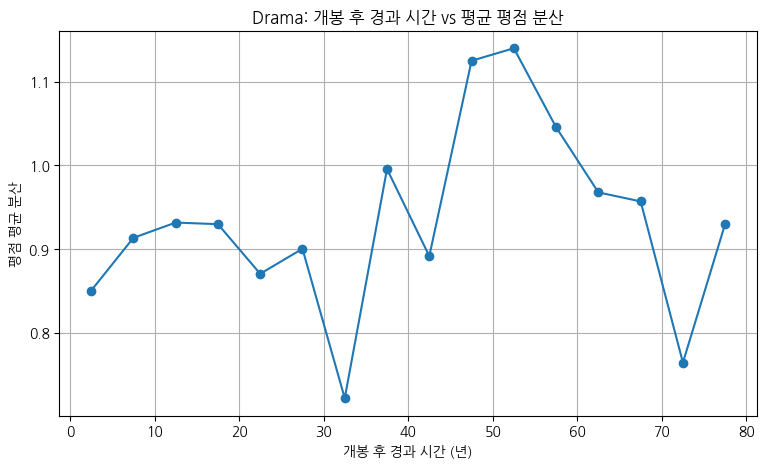

In [ ]:
import matplotlib.pyplot as plt

age_var["age_mid"] = age_var["age_bin"].apply(lambda x: (x.left + x.right)/2)

plt.figure(figsize=(9,5))
plt.plot(age_var["age_mid"], age_var["var"], marker="o")
plt.title(f"{genre}: Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ vs ÌèâÍ∑† ÌèâÏ†ê Î∂ÑÏÇ∞")
plt.xlabel("Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ (ÎÖÑ)")
plt.ylabel("ÌèâÏ†ê ÌèâÍ∑† Î∂ÑÏÇ∞")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# 1) Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("movies_ratings_post2020.csv")

# 2) Í∞úÎ¥âÏó∞ÎèÑ
df["release_year"] = df["title"].str.extract(r"\((\d{4})\)").astype(float)

# 3) rating ÏãúÏ†ê
df["rating_dt"]   = pd.to_datetime(df["timestamp"], unit="s", errors="coerce")
df["rating_year"] = df["rating_dt"].dt.year

# 4) Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ(ÎÖÑ)
df["age_at_rating"] = df["rating_year"] - df["release_year"]
df = df[(df["age_at_rating"] >= 0) & df["age_at_rating"].notna()].copy()
print(df.shape, df.columns[:10])


(164508, 11) Index(['userId', 'movieId', 'rating', 'timestamp', 'rating_dt', 'rating_year',
       'title', 'genres', 'year', 'release_year'],
      dtype='object')


In [ ]:
# Ïû•Î•¥ Î¨∏ÏûêÏó¥ÏùÑ Î∂ÑÌï¥ÌïòÏó¨ Í∞úÏàò ÏßëÍ≥Ñ
genres_long = (
    df.assign(genre_list=df["genres"].fillna("").astype(str).str.split("|"))
      .explode("genre_list")
)
genre_counts = (genres_long[genres_long["genre_list"] != ""]
                .groupby("genre_list")["movieId"].count()
                .sort_values(ascending=False))
top6_genres = genre_counts.index[:6].tolist()
print("Top-6 genres:", top6_genres)


Top-6 genres: ['Drama', 'Action', 'Comedy', 'Thriller', 'Adventure', 'Sci-Fi']


In [ ]:
def make_age_variance_table(df, genre, bins=np.arange(0, 85, 5), min_ratings_per_movie=2):
    # Ïû•Î•¥ ÌïÑÌÑ∞ÎßÅ
    sub = df[df["genres"].str.contains(genre, na=False)].copy()
    if sub.empty:
        return None

    # ÏòÅÌôîÎ≥Ñ Î¶¨Î∑∞ Ïàò ÌïÑÌÑ∞(Î∂ÑÏÇ∞ Í∞ÄÎä•ÌïòÎèÑÎ°ù)
    movie_n = sub.groupby("movieId")["rating"].transform("count")
    sub = sub[movie_n >= min_ratings_per_movie].copy()
    if sub.empty:
        return None

    # ÏòÅÌôîÎ≥Ñ ÌèâÏ†ê Î∂ÑÏÇ∞(ÏΩîÎ°úÎÇò Ïù¥ÌõÑ ÌèâÏ†ê Í∏∞Ï§Ä)
    movie_var = (sub.groupby("movieId")["rating"].var()
                    .reset_index().rename(columns={"rating":"var"}))

    # ÏòÅÌôîÎ≥Ñ ÎåÄÌëú Í≤ΩÍ≥ºÏãúÍ∞Ñ(ÌèâÍ∑†) Î∂ÄÏó¨
    movie_age = sub.groupby("movieId")["age_at_rating"].mean().reset_index()
    movie_var = movie_var.merge(movie_age, on="movieId", how="left")

    # Í≤ΩÍ≥ºÏãúÍ∞Ñ Íµ¨Í∞ÑÌôî ‚Üí Íµ¨Í∞ÑÎ≥Ñ ÌèâÍ∑† Î∂ÑÏÇ∞
    movie_var["age_bin"] = pd.cut(movie_var["age_at_rating"], bins=bins)
    age_var = (movie_var.groupby("age_bin")["var"].mean()
                         .reset_index().dropna(subset=["age_bin"]))
    if age_var.empty:
        return None

    # Íµ¨Í∞Ñ Ï§ëÏïôÍ∞í(ÏãúÍ∞ÅÌôî xÏ∂ï)
    age_var["age_mid"] = age_var["age_bin"].apply(lambda iv: (iv.left + iv.right)/2)
    return age_var


/tmp/ipython-input-502790064.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = (movie_var.groupby("age_bin")["var"].mean()
/tmp/ipython-input-502790064.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = (movie_var.groupby("age_bin")["var"].mean()
/tmp/ipython-input-502790064.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = (movie_var.groupby("age_bin")["var"].mean()
/tmp/ipython-inp

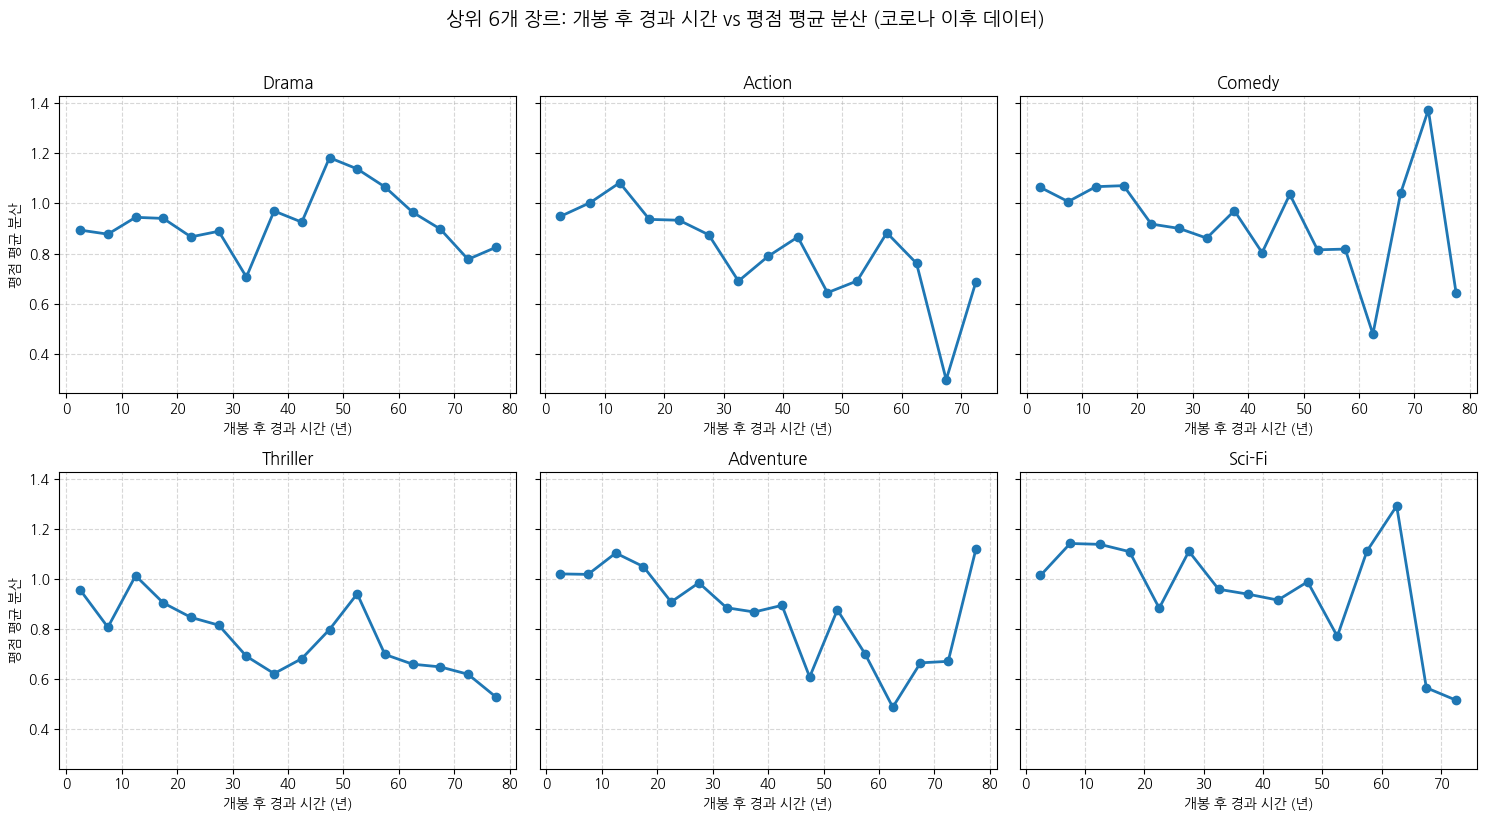

KeyError: 'genre'

In [ ]:
import matplotlib.pyplot as plt

bins = np.arange(0, 85, 5)
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axes = axes.ravel()

summary_rows = []

for i, g in enumerate(top6_genres):
    ax = axes[i]
    age_var = make_age_variance_table(df, g, bins=bins, min_ratings_per_movie=2)
    if (age_var is None) or (len(age_var) < 2):
        ax.set_title(f"{g} (Îç∞Ïù¥ÌÑ∞ Î∂ÄÏ°±)")
        ax.axis("off")
        summary_rows.append({"genre": g, "note": "insufficient data"})
        continue

    # ÏÑ† Í∑∏ÎûòÌîÑ
    ax.plot(age_var["age_mid"], age_var["var"], marker="o", linewidth=2)
    ax.set_title(g)
    ax.set_xlabel("Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ (ÎÖÑ)")
    if i % 3 == 0:
        ax.set_ylabel("ÌèâÏ†ê ÌèâÍ∑† Î∂ÑÏÇ∞")
    ax.grid(True, linestyle="--", alpha=0.5)


# Îπà Ï∂ï ÎÅÑÍ∏∞(ÏÉÅÏúÑ Ïû•Î•¥Í∞Ä 6Í∞ú ÎØ∏ÎßåÏùº Í≤ΩÏö∞ ÎåÄÎπÑ)
for j in range(len(top6_genres), 6):
    axes[j].axis("off")

plt.suptitle("ÏÉÅÏúÑ 6Í∞ú Ïû•Î•¥: Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ vs ÌèâÏ†ê ÌèâÍ∑† Î∂ÑÏÇ∞ (ÏΩîÎ°úÎÇò Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

summary_df = pd.DataFrame(summary_rows)
print(summary_df.sort_values("genre"))


### 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú + Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("movies_ratings_post2020.csv")

# rating ÏãúÏ†ê ÌååÏÉù
df["rating_dt"] = pd.to_datetime(df["timestamp"], unit="s", errors="coerce")
df["rating_year"] = df["rating_dt"].dt.year

# Í∞úÎ¥âÏó∞ÎèÑ: title(1994)ÏóêÏÑú Ï∂îÏ∂ú, ÏóÜÏúºÎ©¥ year Ïª¨Îüº ÏÇ¨Ïö©
df["release_year"] = df["title"].str.extract(r"\((\d{4})\)").astype(float)
if "year" in df.columns:
    df["release_year"] = df["release_year"].fillna(df["year"])

print("cols:", df.columns.tolist())
print(df.head(3))

cols: ['userId', 'movieId', 'rating', 'timestamp', 'rating_dt', 'rating_year', 'title', 'genres', 'year', 'release_year']
   userId  movieId  rating   timestamp           rating_dt  rating_year  \
0      22      316     3.0  1614575253 2021-03-01 05:07:33         2021   
1      22      471     4.0  1583618543 2020-03-07 22:02:23         2020   
2      22      551     4.0  1583618449 2020-03-07 22:00:49         2020   

                                    title                              genres  \
0                         Stargate (1994)             Action|Adventure|Sci-Fi   
1             Hudsucker Proxy, The (1994)                              Comedy   
2  Nightmare Before Christmas, The (1993)  Animation|Children|Fantasy|Musical   

     year  release_year  
0  1994.0        1994.0  
1  1994.0        1994.0  
2  1993.0        1993.0  


### 2. ÏòÅÌôîÎ≥Ñ Î¶¨Î∑∞ Ïàò ÎßåÎì§Í∏∞

In [ ]:
# ÏòÅÌôîÎ≥Ñ Î¶¨Î∑∞ Ïàò Í≥ÑÏÇ∞
rating_counts = (df.groupby("movieId")["rating"]
                   .count()
                   .reset_index()
                   .rename(columns={"rating":"vote_count"}))

# ÏõêÎ≥∏Ïóê merge
df = df.merge(rating_counts, on="movieId", how="left")
print(df[["movieId","title","vote_count"]].head())


   movieId                                   title  vote_count
0      316                         Stargate (1994)          45
1      471             Hudsucker Proxy, The (1994)          16
2      551  Nightmare Before Christmas, The (1993)          64
3      745  Wallace & Gromit: A Close Shave (1995)          22
4     1036                         Die Hard (1988)         187


### 3. Ï§ëÏïôÍ∞í Í∏∞Ï§Ä Ïù∏Í∏∞ ÏòÅÌôî ÌïÑÌÑ∞ÎßÅ

Ï§ëÏïôÍ∞í(median) ‚Üí Î∂ÑÌè¨Ïùò ÏôúÍ≥°(Î™áÎ™á Ï¥àÎåÄÌòï Ïù∏Í∏∞Ïûë)Ïù¥ ÌÅ∞ Í≤ΩÏö∞ Îçî ÌÉÄÎãπÌï®.
Ïòà: ÏòÅÌôîÎ≥Ñ ÌèâÏ†ê ÏàòÍ∞Ä 200Í∞ú Ïù¥ÏÉÅ(Ï§ëÏïôÍ∞í) ‚Üí Ìè¨Ìï®.

Baseline: Ï§ëÏïôÍ∞í Í∏∞Ï§Ä (Ïòà: ÏòÅÌôîÎ≥Ñ Î¶¨Î∑∞ Ïàò ‚â• median)

In [ ]:
# Ï§ëÏïôÍ∞í(Î©îÎîîÏïà) Í∏∞Ï§ÄÏúºÎ°ú Ïù∏Í∏∞Ïûë Ï†ïÏùò
median_votes = df["vote_count"].median()
popular = df[df["vote_count"] >= median_votes].copy()

print(f"Ï†ÑÏ≤¥ Ìñâ Ïàò: {len(df):,}")
print(f"Ï§ëÏïôÍ∞í Í∏∞Ï§Ä vote_count >= {int(median_votes)} Ïù∏ Ìñâ Ïàò: {len(popular):,}")
print(f"ÏòÅÌôî Ïàò(Ï§ëÎ≥µ Ï†úÍ±∞): Ï†ÑÏ≤¥ {df['movieId'].nunique():,} ‚Üí Ïù∏Í∏∞ {popular['movieId'].nunique():,}")


Ï†ÑÏ≤¥ Ìñâ Ïàò: 165,302
Ï§ëÏïôÍ∞í Í∏∞Ï§Ä vote_count >= 58 Ïù∏ Ìñâ Ïàò: 83,243
ÏòÅÌôî Ïàò(Ï§ëÎ≥µ Ï†úÍ±∞): Ï†ÑÏ≤¥ 17,940 ‚Üí Ïù∏Í∏∞ 619


### 4. Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ Íµ¨Í∞ÑÌôî

In [ ]:
# Í≤ΩÍ≥º ÏãúÍ∞Ñ(ÎÖÑ): Î¶¨Î∑∞Í∞Ä ÎÇ®Í≤®ÏßÑ 'Í∑∏ ÏãúÏ†ê' Í∏∞Ï§Ä
popular["age_at_rating"] = popular["rating_year"] - popular["release_year"]
popular = popular[np.isfinite(popular["age_at_rating"]) & (popular["age_at_rating"] >= 0)].copy()

# 5ÎÖÑ Îã®ÏúÑ bin
bins = np.arange(0, popular["age_at_rating"].max() + 5, 5)
labels = [f"{int(b)}~{int(b+5)}ÎÖÑ" for b in bins[:-1]]
popular["time_bin"] = pd.cut(popular["age_at_rating"], bins=bins, right=False, labels=labels)


### 5. ÏòÅÌôî Îã®ÏúÑ Î∂ÑÏÇ∞ Í≥ÑÏÇ∞, Íµ¨Í∞Ñ ÌèâÍ∑† ÏãúÍ∞ÅÌôî

/tmp/ipython-input-2638774687.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_var_by_bin = (movie_var.groupby("time_bin")["var"]


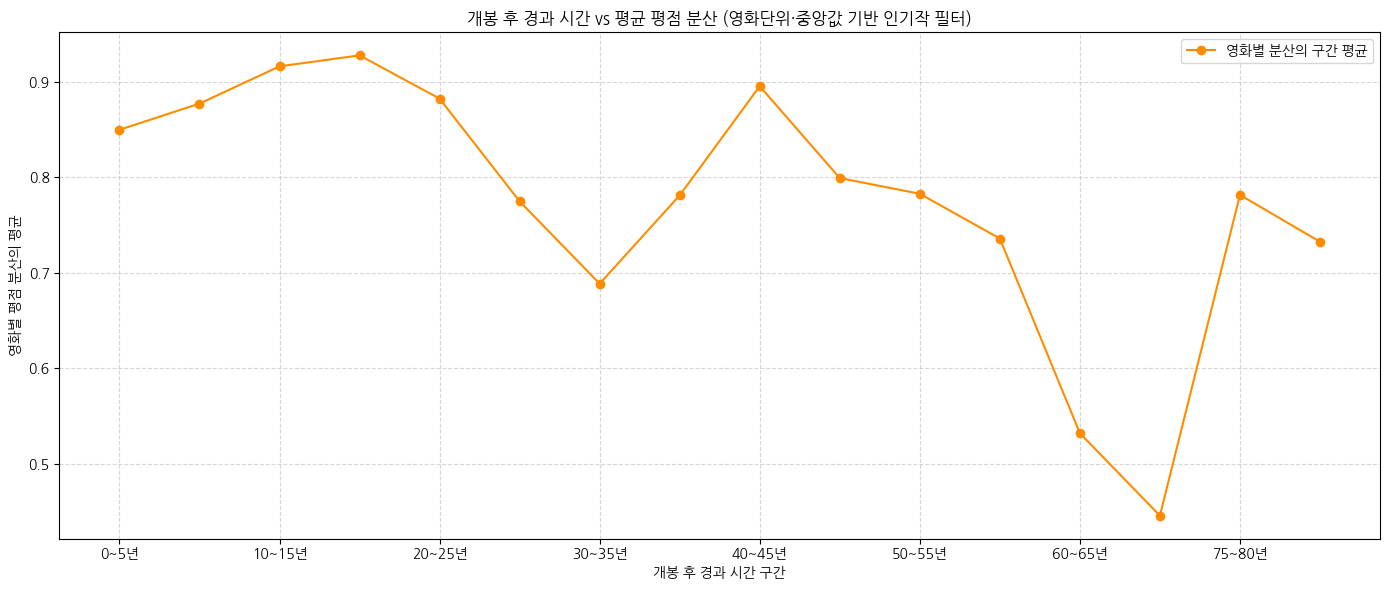

time_bin
0~5ÎÖÑ      0.849970
5~10ÎÖÑ     0.877428
10~15ÎÖÑ    0.916522
15~20ÎÖÑ    0.928040
20~25ÎÖÑ    0.882653
25~30ÎÖÑ    0.774951
30~35ÎÖÑ    0.688593
35~40ÎÖÑ    0.781263
40~45ÎÖÑ    0.895699
45~50ÎÖÑ    0.799384
50~55ÎÖÑ    0.782905
55~60ÎÖÑ    0.735977
60~65ÎÖÑ    0.531914
65~70ÎÖÑ    0.445355
75~80ÎÖÑ    0.781680
80~85ÎÖÑ    0.732629
Name: var, dtype: float64


In [ ]:
# 1) Ïù∏Í∏∞Ïûë ÏßëÌï© ÏïàÏóêÏÑú ÏòÅÌôîÎ≥Ñ Î∂ÑÏÇ∞
movie_var = (popular.groupby("movieId")["rating"]
                .var()
                .reset_index()
                .rename(columns={"rating":"var"}))

# 2) ÏòÅÌôîÎ≥Ñ ÎåÄÌëú age(ÌèâÍ∑†) Î∂ÄÏó¨
movie_age = (popular.groupby("movieId")["age_at_rating"]
                .mean()
                .reset_index())
movie_var = movie_var.merge(movie_age, on="movieId", how="left")

# 3) ÏòÅÌôî Îã®ÏúÑÎ°ú Íµ¨Í∞ÑÌôî ‚Üí Íµ¨Í∞Ñ ÌèâÍ∑† Î∂ÑÏÇ∞
movie_var["time_bin"] = pd.cut(movie_var["age_at_rating"], bins=bins, right=False, labels=labels)
avg_var_by_bin = (movie_var.groupby("time_bin")["var"]
                    .mean()
                    .dropna())

plt.figure(figsize=(14,6))
avg_var_by_bin.plot(marker="o", color="darkorange", label="ÏòÅÌôîÎ≥Ñ Î∂ÑÏÇ∞Ïùò Íµ¨Í∞Ñ ÌèâÍ∑†")
plt.title("Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ vs ÌèâÍ∑† ÌèâÏ†ê Î∂ÑÏÇ∞ (ÏòÅÌôîÎã®ÏúÑ¬∑Ï§ëÏïôÍ∞í Í∏∞Î∞ò Ïù∏Í∏∞Ïûë ÌïÑÌÑ∞)")
plt.xlabel("Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ Íµ¨Í∞Ñ")
plt.ylabel("ÏòÅÌôîÎ≥Ñ ÌèâÏ†ê Î∂ÑÏÇ∞Ïùò ÌèâÍ∑†")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

print(avg_var_by_bin)


### 2Ï∞® ÌöåÍ∑Ä(OLS)  

In [ ]:
import statsmodels.api as sm

# ÏòÅÌôîÎ≥Ñ ÌèâÏ†ê Î∂ÑÏÇ∞ & ÌèâÍ∑† Í≤ΩÍ≥º ÏãúÍ∞Ñ
movie_var = (popular.groupby("movieId")["rating"]
                .var()
                .reset_index()
                .rename(columns={"rating":"var"}))

movie_age = (popular.groupby("movieId")["age_at_rating"]
                .mean()
                .reset_index())

movie_var = movie_var.merge(movie_age, on="movieId", how="left")

# Í≤∞Ï∏°Ïπò / ÏùåÏàò Ï†úÍ±∞
movie_var = movie_var.dropna()
movie_var = movie_var[movie_var["age_at_rating"] >= 0]

print(movie_var.head())


   movieId       var  age_at_rating
0        1  0.777089      26.202830
1        2  0.729814      26.184783
2        6  0.544238      26.408602
3       16  0.713766      26.437500
4       32  0.426119      26.222222


In [ ]:
import numpy as np

X_raw = movie_var["age_at_rating"].values
y = movie_var["var"].values

# 2Ï∞® Îã§Ìï≠Ïãù (ÏÉÅÏàòÌï≠ + x + x^2)
X = np.column_stack([np.ones_like(X_raw), X_raw, X_raw**2])


In [ ]:
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     9.488
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           8.75e-05
Time:                        01:16:27   Log-Likelihood:                -9.7369
No. Observations:                 617   AIC:                             25.47
Df Residuals:                     614   BIC:                             38.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8834      0.023     38.923      0.0

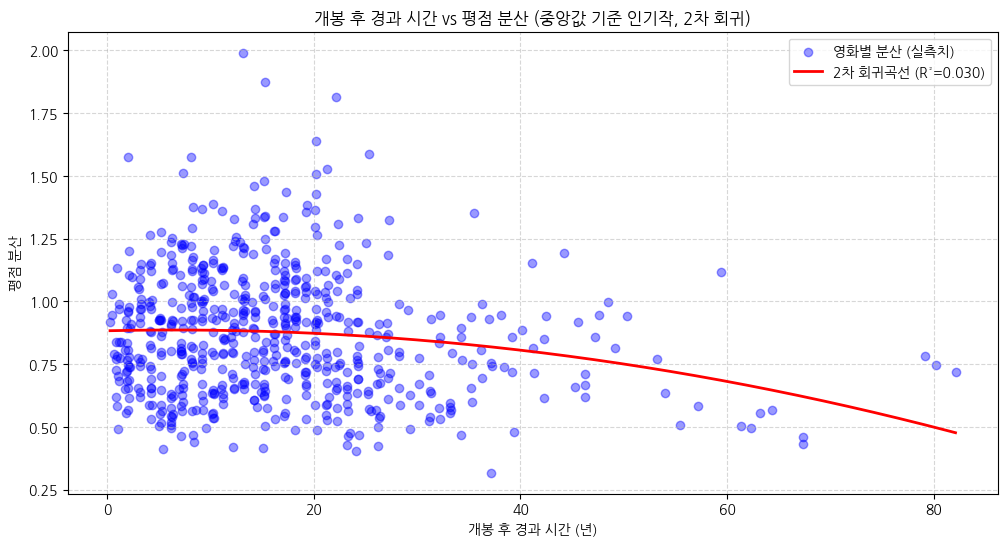

In [ ]:
import matplotlib.pyplot as plt

# ÏòàÏ∏°Ïö© Íµ¨Í∞Ñ
xg = np.linspace(X_raw.min(), X_raw.max(), 300)
Xg = np.column_stack([np.ones_like(xg), xg, xg**2])
y_pred = ols_model.predict(Xg)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,6))
plt.scatter(X_raw, y, alpha=0.4, label="ÏòÅÌôîÎ≥Ñ Î∂ÑÏÇ∞ (Ïã§Ï∏°Ïπò)", color="blue")
plt.plot(xg, y_pred, color="red", linewidth=2,
         label=f"2Ï∞® ÌöåÍ∑ÄÍ≥°ÏÑ† (R¬≤={ols_model.rsquared:.3f})")

plt.title("Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ vs ÌèâÏ†ê Î∂ÑÏÇ∞ (Ï§ëÏïôÍ∞í Í∏∞Ï§Ä Ïù∏Í∏∞Ïûë, 2Ï∞® ÌöåÍ∑Ä)")
plt.xlabel("Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ (ÎÖÑ)")
plt.ylabel("ÌèâÏ†ê Î∂ÑÏÇ∞")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [ ]:
import pandas as pd

# ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("movies_ratings_post2020.csv")

# Ìñâ(row), Ïó¥(column) Í∞úÏàò Ï∂úÎ†•
print("Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ (Ìñâ, Ïó¥):", df.shape)

# Ïó¥ Ïù¥Î¶Ñ ÌôïÏù∏
print("\nÏª¨Îüº Î™©Î°ù:")
print(df.columns.tolist())

# ÏïûÎ∂ÄÎ∂Ñ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("\nÎç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
print(df.head())

Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ (Ìñâ, Ïó¥): (165302, 9)

Ïª¨Îüº Î™©Î°ù:
['userId', 'movieId', 'rating', 'timestamp', 'rating_dt', 'rating_year', 'title', 'genres', 'year']

Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:
   userId  movieId  rating   timestamp            rating_dt  rating_year  \
0      22      316     3.0  1614575253  2021-03-01 05:07:33         2021   
1      22      471     4.0  1583618543  2020-03-07 22:02:23         2020   
2      22      551     4.0  1583618449  2020-03-07 22:00:49         2020   
3      22      745     5.0  1668909890  2022-11-20 02:04:50         2022   
4      22     1036     3.5  1674334081  2023-01-21 20:48:01         2023   

                                    title                              genres  \
0                         Stargate (1994)             Action|Adventure|Sci-Fi   
1             Hudsucker Proxy, The (1994)                              Comedy   
2  Nightmare Before Christmas, The (1993)  Animation|Children|Fantasy|Musical   
3  Wallace & Gromit: A Close Shave (1995)  

## Îç∞Ïù¥ÌÑ∞ ÏõêÎ≥∏ÏúºÎ°ú Îã§Ïãú ÌïÑÌÑ∞ÎßÅ

In [ ]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

print("movies shape:", movies.shape)
print("ratings shape:", ratings.shape)
print("\nmovies Ïª¨Îüº:", movies.columns.tolist())
print("ratings Ïª¨Îüº:", ratings.columns.tolist())


movies shape: (87585, 3)
ratings shape: (9594612, 4)

movies Ïª¨Îüº: ['movieId', 'title', 'genres']
ratings Ïª¨Îüº: ['userId', 'movieId', 'rating', 'timestamp']


In [ ]:
# titleÏóêÏÑú Ïó∞ÎèÑ Ï∂îÏ∂ú
movies["release_year"] = movies["title"].str.extract(r"\((\d{4})\)").astype(float)

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨: Ïó∞ÎèÑ ÏóÜÏúºÎ©¥ NaNÏúºÎ°ú ÎÇ®ÍπÄ
print(movies[["title","release_year"]].head())


                                title  release_year
0                    Toy Story (1995)        1995.0
1                      Jumanji (1995)        1995.0
2             Grumpier Old Men (1995)        1995.0
3            Waiting to Exhale (1995)        1995.0
4  Father of the Bride Part II (1995)        1995.0


In [ ]:
# timestamp ‚Üí datetime Î≥ÄÌôò
ratings["rating_dt"] = pd.to_datetime(ratings["timestamp"], unit="s", errors="coerce")
ratings["rating_year"] = ratings["rating_dt"].dt.year

# 2020-01-01 Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Îßå ÎÇ®Í∏∞Í∏∞
ratings_2020 = ratings[ratings["rating_dt"] >= "2020-01-01"].copy()
print("ÏõêÎ≥∏ ratings:", len(ratings))
print("2020ÎÖÑ Ïù¥ÌõÑ ratings:", len(ratings_2020))


ÏõêÎ≥∏ ratings: 9594612
2020ÎÖÑ Ïù¥ÌõÑ ratings: 1371715


In [ ]:
# ratings_2020Í≥º movies Î≥ëÌï©
df = ratings_2020.merge(movies[["movieId","title","genres","release_year"]],
                        on="movieId", how="left")

print(df.head())
print("ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", df.shape)


   userId  movieId  rating   timestamp           rating_dt  rating_year  \
0      22      316     3.0  1614575253 2021-03-01 05:07:33         2021   
1      22      471     4.0  1583618543 2020-03-07 22:02:23         2020   
2      22      551     4.0  1583618449 2020-03-07 22:00:49         2020   
3      22      745     5.0  1668909890 2022-11-20 02:04:50         2022   
4      22     1036     3.5  1674334081 2023-01-21 20:48:01         2023   

                                    title                              genres  \
0                         Stargate (1994)             Action|Adventure|Sci-Fi   
1             Hudsucker Proxy, The (1994)                              Comedy   
2  Nightmare Before Christmas, The (1993)  Animation|Children|Fantasy|Musical   
3  Wallace & Gromit: A Close Shave (1995)           Animation|Children|Comedy   
4                         Die Hard (1988)               Action|Crime|Thriller   

   release_year  
0        1994.0  
1        1994.0  
2       

In [ ]:
df["age_at_rating"] = df["rating_year"] - df["release_year"]
df = df[(df["age_at_rating"] >= 0) & df["age_at_rating"].notna()]

print(df[["title","release_year","rating_year","age_at_rating"]].head())


                                    title  release_year  rating_year  \
0                         Stargate (1994)        1994.0         2021   
1             Hudsucker Proxy, The (1994)        1994.0         2020   
2  Nightmare Before Christmas, The (1993)        1993.0         2020   
3  Wallace & Gromit: A Close Shave (1995)        1995.0         2022   
4                         Die Hard (1988)        1988.0         2023   

   age_at_rating  
0           27.0  
1           26.0  
2           27.0  
3           27.0  
4           35.0  


In [ ]:
# df Ï†ÄÏû• (CSV)
df.to_csv("movies_ratings_post2020_clean.csv", index=False, encoding="utf-8-sig")

print("Ï†ÄÏû• ÏôÑÎ£å: movies_ratings_post2020_clean.csv")

Ï†ÄÏû• ÏôÑÎ£å: movies_ratings_post2020_clean.csv


### Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞ÑÏóê Îî∞Î•∏ ÌèâÏ†ê Î∂ÑÏÇ∞

In [ ]:
# ÏòÅÌôîÎ≥Ñ ÌèâÏ†ê Î∂ÑÏÇ∞ Í≥ÑÏÇ∞
movie_var = (df.groupby("movieId")["rating"]
               .var()
               .reset_index()
               .rename(columns={"rating":"var"}))

# ÏòÅÌôîÎ≥Ñ ÌèâÍ∑† Í≤ΩÍ≥º ÏãúÍ∞ÑÎèÑ Í≥ÑÏÇ∞
movie_age = (df.groupby("movieId")["age_at_rating"]
               .mean()
               .reset_index())

# Î≥ëÌï©
movie_stats = movie_var.merge(movie_age, on="movieId", how="left")

print(movie_stats.head())


   movieId       var  age_at_rating
0        1  0.888990      26.111176
1        2  0.789257      26.159317
2        3  1.211885      26.098361
3        4  0.875000      27.166667
4        5  1.377506      26.122807


In [ ]:
import numpy as np

bins = np.arange(0, movie_stats["age_at_rating"].max() + 5, 5)
labels = [f"{int(b)}~{int(b+5)}ÎÖÑ" for b in bins[:-1]]
movie_stats["age_bin"] = pd.cut(movie_stats["age_at_rating"], bins=bins, labels=labels, right=False)

# Íµ¨Í∞ÑÎ≥Ñ ÌèâÍ∑† Î∂ÑÏÇ∞
age_var = movie_stats.groupby("age_bin")["var"].mean().dropna().reset_index()
print(age_var)


     age_bin       var
0       0~5ÎÖÑ  1.058252
1      5~10ÎÖÑ  1.048455
2     10~15ÎÖÑ  1.028296
3     15~20ÎÖÑ  1.025612
4     20~25ÎÖÑ  0.993058
5     25~30ÎÖÑ  0.928700
6     30~35ÎÖÑ  0.946154
7     35~40ÎÖÑ  0.962399
8     40~45ÎÖÑ  0.915513
9     45~50ÎÖÑ  0.976987
10    50~55ÎÖÑ  1.025894
11    55~60ÎÖÑ  0.975162
12    60~65ÎÖÑ  0.839709
13    65~70ÎÖÑ  0.915109
14    70~75ÎÖÑ  0.836389
15    75~80ÎÖÑ  0.879971
16    80~85ÎÖÑ  0.889267
17    85~90ÎÖÑ  0.690916
18    90~95ÎÖÑ  0.797091
19   95~100ÎÖÑ  0.674962
20  100~105ÎÖÑ  0.626626
21  105~110ÎÖÑ  0.712435
22  110~115ÎÖÑ  0.865257
23  115~120ÎÖÑ  0.991847
24  120~125ÎÖÑ  0.903636
25  125~130ÎÖÑ  1.175427
26  130~135ÎÖÑ  0.477183
27  140~145ÎÖÑ  0.125000
28  145~150ÎÖÑ  1.500000


/tmp/ipython-input-341719557.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = movie_stats.groupby("age_bin")["var"].mean().dropna().reset_index()


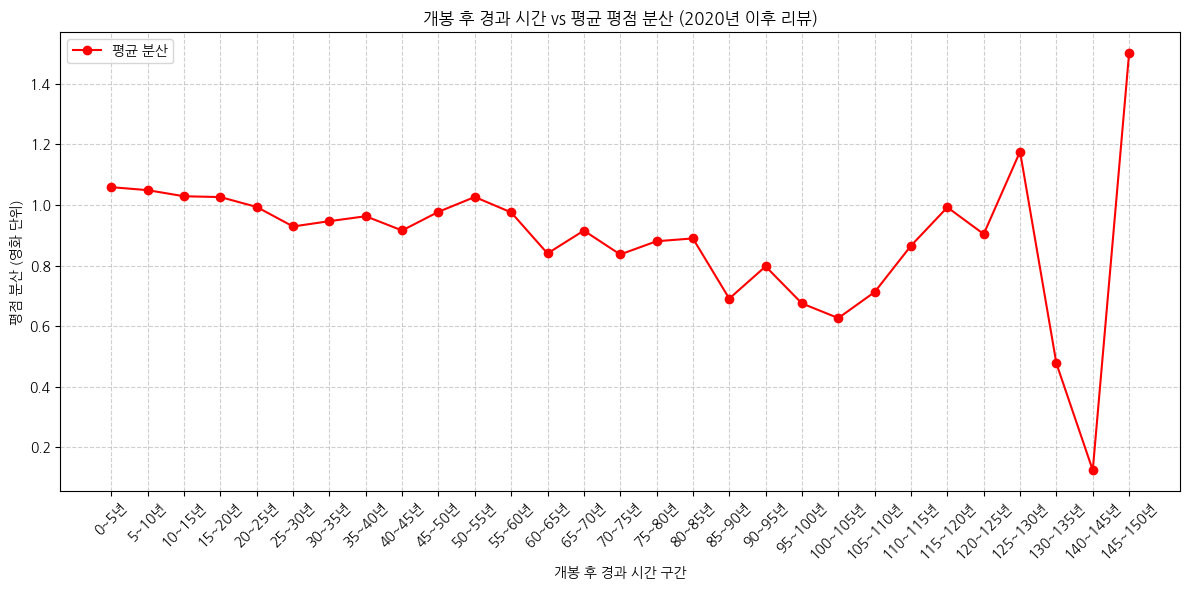

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(age_var["age_bin"], age_var["var"], marker="o", color="red", label="ÌèâÍ∑† Î∂ÑÏÇ∞")

plt.title("Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ vs ÌèâÍ∑† ÌèâÏ†ê Î∂ÑÏÇ∞ (2020ÎÖÑ Ïù¥ÌõÑ Î¶¨Î∑∞)")
plt.xlabel("Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ Íµ¨Í∞Ñ")
plt.ylabel("ÌèâÏ†ê Î∂ÑÏÇ∞ (ÏòÅÌôî Îã®ÏúÑ)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Ìñâ(row), Ïó¥(column) Í∞úÏàò Ï∂úÎ†•
print("Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ (Ìñâ, Ïó¥):", df.shape)

# Ïó¥ Ïù¥Î¶Ñ ÌôïÏù∏
print("\nÏª¨Îüº Î™©Î°ù:")
print(df.columns.tolist())

# ÏïûÎ∂ÄÎ∂Ñ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("\nÎç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
print(df.head())

Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ (Ìñâ, Ïó¥): (1365030, 10)

Ïª¨Îüº Î™©Î°ù:
['userId', 'movieId', 'rating', 'timestamp', 'rating_dt', 'rating_year', 'title', 'genres', 'release_year', 'age_at_rating']

Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:
   userId  movieId  rating   timestamp           rating_dt  rating_year  \
0      22      316     3.0  1614575253 2021-03-01 05:07:33         2021   
1      22      471     4.0  1583618543 2020-03-07 22:02:23         2020   
2      22      551     4.0  1583618449 2020-03-07 22:00:49         2020   
3      22      745     5.0  1668909890 2022-11-20 02:04:50         2022   
4      22     1036     3.5  1674334081 2023-01-21 20:48:01         2023   

                                    title                              genres  \
0                         Stargate (1994)             Action|Adventure|Sci-Fi   
1             Hudsucker Proxy, The (1994)                              Comedy   
2  Nightmare Before Christmas, The (1993)  Animation|Children|Fantasy|Musical   
3  Wallace & Gromit: A

In [ ]:
target_genres = ["Drama", "Action", "Comedy", "Thriller", "Adventure", "Sci-Fi"]

/tmp/ipython-input-2855564486.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = (movie_stats.groupby("age_bin")["var"]
/tmp/ipython-input-2855564486.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = (movie_stats.groupby("age_bin")["var"]
/tmp/ipython-input-2855564486.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = (movie_stats.groupby("age_bin")["var"]
/tmp/ipython-input-285556448

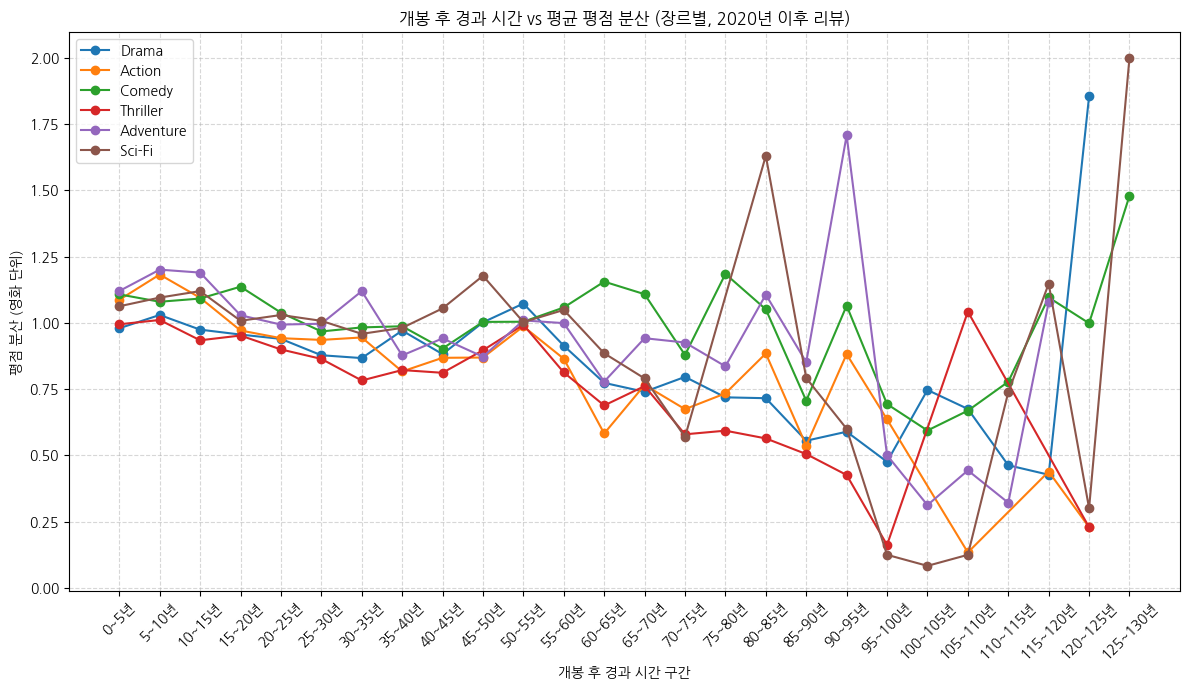

In [ ]:
import numpy as np

# ÏãúÍ∞ÅÌôî Ï§ÄÎπÑ
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Í∞Å Ïû•Î•¥Î≥Ñ Î∞òÎ≥µ
for genre in target_genres:
    # Ìï¥Îãπ Ïû•Î•¥ Ìè¨Ìï®Îêú ÏòÅÌôîÎßå Ï∂îÏ∂ú
    genre_df = df[df["genres"].str.contains(genre, na=False)].copy()

    # ÏòÅÌôîÎ≥Ñ ÌèâÏ†ê Î∂ÑÏÇ∞
    movie_var = (genre_df.groupby("movieId")["rating"]
                    .var()
                    .reset_index()
                    .rename(columns={"rating":"var"}))

    # ÏòÅÌôîÎ≥Ñ ÌèâÍ∑† age
    movie_age = (genre_df.groupby("movieId")["age_at_rating"]
                    .mean()
                    .reset_index())

    # Î≥ëÌï©
    movie_stats = movie_var.merge(movie_age, on="movieId", how="left").dropna()
    movie_stats = movie_stats[movie_stats["age_at_rating"] >= 0]

    # Íµ¨Í∞ÑÌôî (5ÎÖÑ Îã®ÏúÑ)
    bins = np.arange(0, movie_stats["age_at_rating"].max() + 5, 5)
    labels = [f"{int(b)}~{int(b+5)}ÎÖÑ" for b in bins[:-1]]
    movie_stats["age_bin"] = pd.cut(movie_stats["age_at_rating"], bins=bins, labels=labels, right=False)

    # Íµ¨Í∞ÑÎ≥Ñ ÌèâÍ∑† Î∂ÑÏÇ∞
    age_var = (movie_stats.groupby("age_bin")["var"]
                          .mean()
                          .dropna()
                          .reset_index())

    # ÏãúÍ∞ÅÌôî
    plt.plot(age_var["age_bin"], age_var["var"], marker="o", label=genre)

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.title("Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ vs ÌèâÍ∑† ÌèâÏ†ê Î∂ÑÏÇ∞ (Ïû•Î•¥Î≥Ñ, 2020ÎÖÑ Ïù¥ÌõÑ Î¶¨Î∑∞)")
plt.xlabel("Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ Íµ¨Í∞Ñ")
plt.ylabel("ÌèâÏ†ê Î∂ÑÏÇ∞ (ÏòÅÌôî Îã®ÏúÑ)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
THRESH = 100  # 100ÎÖÑ Ïù¥ÏÉÅ
df_100 = df[df["age_at_rating"] >= THRESH].copy()

print(f"[Î¶¨Î∑∞ Ìñâ Ïàò] age_at_rating ‚â• {THRESH}: {len(df_100):,}Ìñâ")
print(f"[ÏòÅÌôî(Í≥†Ïú†) Ïàò] age_at_rating ‚â• {THRESH}: {df_100['movieId'].nunique():,}Ìé∏")

[Î¶¨Î∑∞ Ìñâ Ïàò] age_at_rating ‚â• 100: 1,451Ìñâ
[ÏòÅÌôî(Í≥†Ïú†) Ïàò] age_at_rating ‚â• 100: 499Ìé∏


In [ ]:
cols = {
    "title": ("title","first"),
    "genres": ("genres","first"),
    "release_year": ("release_year","first"),
    "mean_age": ("age_at_rating","mean"),
    "min_rating_year": ("rating_year","min"),
    "max_rating_year": ("rating_year","max"),
    "n_ratings": ("rating","count"),
}
movie_100 = (df_100
             .groupby("movieId")
             .agg(**cols)
             .reset_index()
             .sort_values(["n_ratings","mean_age"], ascending=[False, False]))

print(f"Î™©Î°ù(ÏÉÅÏúÑ 20Ìé∏):\n{movie_100.head(20)}")

Î™©Î°ù(ÏÉÅÏúÑ 20Ìé∏):
     movieId                                              title  \
11      6987  Cabinet of Dr. Caligari, The (Cabinet des Dr. ...   
29     32898  Trip to the Moon, A (Voyage dans la lune, Le) ...   
7       3310                                    Kid, The (1921)   
0       1348  Nosferatu (Nosferatu, eine Symphonie des Graue...   
13      7065                      Birth of a Nation, The (1915)   
33     49389                     The Great Train Robbery (1903)   
15      7243  Intolerance: Love's Struggle Throughout the Ag...   
6       3309                               Dog's Life, A (1918)   
61     82848                                    One Week (1920)   
27     25744  Haxan: Witchcraft Through the Ages (a.k.a. The...   
18      8511                              Immigrant, The (1917)   
24     25741           Phantom Carriage, The (K√∂rkarlen) (1921)   
92     98981                     Arrival of a Train, The (1896)   
12      6988  Broken Blossoms or The Ye

In [ ]:
MIN_REV = 20   # ÌïÑÏöîÏãú 5/10/50 Îì±ÏúºÎ°ú Ï°∞Ï†à
movie_100_min = movie_100[movie_100["n_ratings"] >= MIN_REV].copy()

print(f"\n[Î¶¨Î∑∞ {MIN_REV}Í∞ú Ïù¥ÏÉÅ] ÏòÅÌôî Ïàò: {len(movie_100_min):,}Ìé∏")
print(movie_100_min.head(20))


[Î¶¨Î∑∞ 20Í∞ú Ïù¥ÏÉÅ] ÏòÅÌôî Ïàò: 6Ìé∏
    movieId                                              title  \
11     6987  Cabinet of Dr. Caligari, The (Cabinet des Dr. ...   
29    32898  Trip to the Moon, A (Voyage dans la lune, Le) ...   
7      3310                                    Kid, The (1921)   
0      1348  Nosferatu (Nosferatu, eine Symphonie des Graue...   
13     7065                      Birth of a Nation, The (1915)   
33    49389                     The Great Train Robbery (1903)   

                             genres  release_year    mean_age  \
11             Crime|Fantasy|Horror        1920.0  101.353448   
29  Action|Adventure|Fantasy|Sci-Fi        1902.0  119.303371   
7                      Comedy|Drama        1921.0  100.714286   
0                            Horror        1922.0  100.416667   
13                        Drama|War        1915.0  106.440000   
33                    Crime|Western        1903.0  118.260870   

    min_rating_year  max_rating_year  n_r

### Ï§ëÏïôÍ∞í Í∏∞Ï§Ä ÌïÑÌÑ∞ÎßÅ

In [ ]:
import numpy as np

# ÏòÅÌôîÎ≥Ñ Î¶¨Î∑∞ Ïàò ÏßëÍ≥Ñ
movie_counts = df.groupby("movieId")["rating"].count().reset_index().rename(columns={"rating":"n_ratings"})

# Ï§ëÏïôÍ∞í Í≥ÑÏÇ∞
median_reviews = movie_counts["n_ratings"].median()
print("Î¶¨Î∑∞ Ïàò Ï§ëÏïôÍ∞í:", median_reviews)

# ÏÉÅÏúÑ 50% ÏòÅÌôîÎßå ÎÇ®ÍπÄ
popular_movies = movie_counts[movie_counts["n_ratings"] >= median_reviews]
df_popular = df.merge(popular_movies[["movieId"]], on="movieId", how="inner")

print("ÌïÑÌÑ∞ÎßÅ ÌõÑ Î¶¨Î∑∞ Ïàò:", len(df_popular))
print("ÌïÑÌÑ∞ÎßÅ ÌõÑ ÏòÅÌôî Ïàò:", df_popular['movieId'].nunique())


Î¶¨Î∑∞ Ïàò Ï§ëÏïôÍ∞í: 2.0
ÌïÑÌÑ∞ÎßÅ ÌõÑ Î¶¨Î∑∞ Ïàò: 1347255
ÌïÑÌÑ∞ÎßÅ ÌõÑ ÏòÅÌôî Ïàò: 27115


ÎßéÏùÄ ÏòÅÌôîÎì§Ïù¥ Î¶¨Î∑∞Î•º Í±∞Ïùò Ïïà Î∞õÏïòÍ≥†, ÏòÅÌôî ÏàòÎäî ÎßéÏßÄÎßå Î¶¨Î∑∞Í∞Ä 1~2Í∞úÎ∞ñÏóê ÏóÜÎäî ÏûëÌíàÏù¥ Ï†àÎ∞ò Ïù¥ÏÉÅÏù¥ÎùºÎäî ÏÉÅÌô©Ïù¥ Í¥ÄÏ∏°Îê®.

-> Ïã§Ï†úÎ°ú Ïù¥Îü∞ Î∂ÑÌè¨Îäî Î≥¥ÌÜµ power law / Zipf‚Äôs lawÏ≤òÎüº,
Ïª®ÌÖêÏ∏† ÌîåÎû´Ìèº(ÏôìÏ±†, ÎÑ∑ÌîåÎ¶≠Ïä§, Ïä§ÌåÄ Îì±)ÏóêÏÑú "ÎåÄÎ∂ÄÎ∂ÑÏùò ÏûëÌíàÏùÄ ÏÜåÏàòÎßå ÏÜåÎπÑÌïòÍ≥†, ÏÜåÏàòÏùò Ïù∏Í∏∞ÏûëÏù¥ Îã§ÏàòÏùò Î¶¨Î∑∞Î•º ÎèÖÏ†ê"ÌïòÎäî Íµ¨Ï°∞ ÎïåÎ¨∏

Ï§ëÏïôÍ∞íÏùò Î∂ÑÌè¨Í∞Ä Í∑πÎã®Ï†ÅÏúºÎ°ú ÏπòÏö∞Ï≥êÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, ÏùòÎØ∏Í∞Ä ÏóÜÎäî Í∏∞Ï§ÄÏù¥ÎùºÍ≥† ÌåêÎã®Ìï®.

ÏÉÅÏúÑ 75% (3ÏÇ¨Î∂ÑÏúÑÏàò) Ïù¥ÏÉÅ, Î¶¨Î∑∞ ÏàòÍ∞Ä ÏÉÅÏúÑ 25%Ïóê ÏÜçÌïòÎäî ÏòÅÌôîÎßå Î∂ÑÏÑùÌï¥ Î¶¨Î∑∞ ÏàòÍ∞Ä Î∂ÑÏÑù Í∞ÄÎä•Ìïú Ï†ïÎèÑÏù∏ Îç∞Ïù¥ÌÑ∞Îßå ÎΩëÏïÑÎÇ¥Í∏∞Î°ú Í≤∞Ï†ï

In [ ]:
# Î¶¨Î∑∞ Ïàò Î∂ÑÏúÑÏàò Í∏∞Ï§Ä Í≥ÑÏÇ∞
q75 = movie_counts["n_ratings"].quantile(0.75)
q90 = movie_counts["n_ratings"].quantile(0.90)

print("Î¶¨Î∑∞ Ïàò 75% Î∂ÑÏúÑÏàò:", q75)
print("Î¶¨Î∑∞ Ïàò 90% Î∂ÑÏúÑÏàò:", q90)

# 75% Ïù¥ÏÉÅ ÏòÅÌôîÎßå ÎÇ®Í∏∞Í∏∞
popular_75 = movie_counts[movie_counts["n_ratings"] >= q75]
df_popular_75 = df.merge(popular_75[["movieId"]], on="movieId", how="inner")

# 90% Ïù¥ÏÉÅ ÏòÅÌôîÎßå ÎÇ®Í∏∞Í∏∞
popular_90 = movie_counts[movie_counts["n_ratings"] >= q90]
df_popular_90 = df.merge(popular_90[["movieId"]], on="movieId", how="inner")

print("ÌïÑÌÑ∞ÎßÅ ÌõÑ ÏòÅÌôî Ïàò (ÏÉÅÏúÑ 25%):", df_popular_75["movieId"].nunique())
print("ÌïÑÌÑ∞ÎßÅ ÌõÑ ÏòÅÌôî Ïàò (ÏÉÅÏúÑ 10%):", df_popular_90["movieId"].nunique())

Î¶¨Î∑∞ Ïàò 75% Î∂ÑÏúÑÏàò: 7.0
Î¶¨Î∑∞ Ïàò 90% Î∂ÑÏúÑÏàò: 37.0
ÌïÑÌÑ∞ÎßÅ ÌõÑ ÏòÅÌôî Ïàò (ÏÉÅÏúÑ 25%): 11851
ÌïÑÌÑ∞ÎßÅ ÌõÑ ÏòÅÌôî Ïàò (ÏÉÅÏúÑ 10%): 4522


### 75%, 90%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ÏòÅÌôîÎ≥Ñ Î¶¨Î∑∞ Ïàò ÏßëÍ≥Ñ
movie_counts = (df.groupby("movieId")["rating"]
                  .count()
                  .reset_index()
                  .rename(columns={"rating":"n_ratings"}))

# Î∂ÑÏúÑÏàò Í≥ÑÏÇ∞ (ÏõêÌïòÎäî Í∞íÏúºÎ°ú Î∞îÍæ∏ÏÑ∏Ïöî: 0.75 ÎòêÎäî 0.90 Îì±)
q75 = movie_counts["n_ratings"].quantile(0.75)
q90 = movie_counts["n_ratings"].quantile(0.90)
print("Î¶¨Î∑∞ Ïàò 75% Î∂ÑÏúÑÏàò:", int(q75))
print("Î¶¨Î∑∞ Ïàò 90% Î∂ÑÏúÑÏàò:", int(q90))


Î¶¨Î∑∞ Ïàò 75% Î∂ÑÏúÑÏàò: 7
Î¶¨Î∑∞ Ïàò 90% Î∂ÑÏúÑÏàò: 37


In [ ]:
def plot_overall_by_percentile(df, movie_counts, percentile=0.75, bin_years=5, title_suffix="(ÏÉÅÏúÑ 25%)"):
    # 1) ÌïÑÌÑ∞ÎßÅ
    thr = movie_counts["n_ratings"].quantile(percentile)
    popular_ids = movie_counts.loc[movie_counts["n_ratings"] >= thr, "movieId"]
    dfp = df[df["movieId"].isin(popular_ids)].copy()

    print(f"[{percentile:.2f} Î∂ÑÏúÑÏàò Í∏∞Ï§Ä] ÏûÑÍ≥ÑÍ∞í={int(thr)}, Î¶¨Î∑∞ Ìñâ={len(dfp):,}, ÏòÅÌôî Ïàò={dfp['movieId'].nunique():,}")

    # 2) ÏòÅÌôî Îã®ÏúÑ Î∂ÑÏÇ∞ & ÎåÄÌëú age(ÌèâÍ∑†) Í≥ÑÏÇ∞
    mv = (dfp.groupby("movieId")["rating"].var().reset_index().rename(columns={"rating":"var"}))
    ages = (dfp.groupby("movieId")["age_at_rating"].mean().reset_index())
    mv = mv.merge(ages, on="movieId", how="left").dropna()
    mv = mv[mv["age_at_rating"] >= 0]

    # 3) Íµ¨Í∞ÑÌôî
    if mv.empty:
        print("ÌïÑÌÑ∞ Í≤∞Í≥ºÍ∞Ä ÎπÑÏóàÏäµÎãàÎã§. ÌçºÏÑºÌÉÄÏùºÏùÑ ÎÇÆÏ∂îÍ±∞ÎÇò Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§.")
        return
    bins = np.arange(0, mv["age_at_rating"].max() + bin_years, bin_years)
    if len(bins) < 2:  # ÏïàÏ†ÑÏû•Ïπò
        bins = np.array([0, bin_years])
    mv["age_bin"] = pd.cut(mv["age_at_rating"], bins=bins)

    # 4) Íµ¨Í∞Ñ ÌèâÍ∑† Î∂ÑÏÇ∞
    age_var = mv.groupby("age_bin")["var"].mean().reset_index()

    # 5) ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12,6))
    plt.plot(age_var["age_bin"].astype(str), age_var["var"], marker="o", color="red", label="ÌèâÍ∑† Î∂ÑÏÇ∞")
    plt.xticks(rotation=45)
    plt.title(f"Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ vs ÌèâÍ∑† ÌèâÏ†ê Î∂ÑÏÇ∞ {title_suffix}")
    plt.xlabel("Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ Íµ¨Í∞Ñ (ÎÖÑ)")
    plt.ylabel("ÌèâÏ†ê Î∂ÑÏÇ∞ (ÏòÅÌôî Îã®ÏúÑ)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_by_genre_percentile(
    df, movie_counts, percentile=0.75, target_genres=None, bin_years=5, ncols=3, suptitle_suffix="(ÏÉÅÏúÑ 25%)"
):
    if target_genres is None:
        target_genres = ["Drama","Action","Comedy","Thriller","Adventure","Sci-Fi"]

    thr = movie_counts["n_ratings"].quantile(percentile)
    popular_ids = movie_counts.loc[movie_counts["n_ratings"] >= thr, "movieId"]
    dfp = df[df["movieId"].isin(popular_ids)].copy()

    print(f"[Ïû•Î•¥Î≥Ñ] {percentile:.2f} Î∂ÑÏúÑÏàò Í∏∞Ï§Ä ÏûÑÍ≥ÑÍ∞í={int(thr)}, Î¶¨Î∑∞ Ìñâ={len(dfp):,}, ÏòÅÌôî Ïàò={dfp['movieId'].nunique():,}")

    n = len(target_genres)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows), sharey=True)
    axes = np.array(axes).reshape(-1)  # 2D ‚Üí 1D

    for i, g in enumerate(target_genres):
        ax = axes[i]
        sub = dfp[dfp["genres"].str.contains(g, na=False)].copy()
        if sub.empty:
            ax.set_title(f"{g} (Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå)")
            ax.axis("off")
            continue

        # ÏòÅÌôî Îã®ÏúÑ Î∂ÑÏÇ∞ & ÎåÄÌëú age
        mv = (sub.groupby("movieId")["rating"].var().reset_index().rename(columns={"rating":"var"}))
        ages = (sub.groupby("movieId")["age_at_rating"].mean().reset_index())
        mv = mv.merge(ages, on="movieId", how="left").dropna()
        mv = mv[mv["age_at_rating"] >= 0]

        if mv.empty:
            ax.set_title(f"{g} (ÏòÅÌôî ÏóÜÏùå)")
            ax.axis("off")
            continue

        bins = np.arange(0, mv["age_at_rating"].max() + bin_years, bin_years)
        if len(bins) < 2:
            bins = np.array([0, bin_years])
        mv["age_bin"] = pd.cut(mv["age_at_rating"], bins=bins)

        age_var = mv.groupby("age_bin")["var"].mean().reset_index()

        ax.plot(age_var["age_bin"].astype(str), age_var["var"], marker="o")
        ax.set_title(g)
        ax.set_xlabel("Í≤ΩÍ≥º ÏãúÍ∞Ñ (ÎÖÑ)")
        ax.set_ylabel("ÌèâÏ†ê Î∂ÑÏÇ∞")
        ax.tick_params(axis="x", rotation=45)
        ax.grid(True, linestyle="--", alpha=0.5)

    # ÎÇ®Îäî ÏÑúÎ∏åÌîåÎ°Ø ÎπÑÌôúÏÑ±Ìôî
    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    plt.suptitle(f"Ïû•Î•¥Î≥Ñ: Í∞úÎ¥â ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ vs ÌèâÍ∑† ÌèâÏ†ê Î∂ÑÏÇ∞ {suptitle_suffix}", fontsize=14)
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()


[0.75 Î∂ÑÏúÑÏàò Í∏∞Ï§Ä] ÏûÑÍ≥ÑÍ∞í=7, Î¶¨Î∑∞ Ìñâ=1,299,229, ÏòÅÌôî Ïàò=11,851


/tmp/ipython-input-1585253178.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = mv.groupby("age_bin")["var"].mean().reset_index()


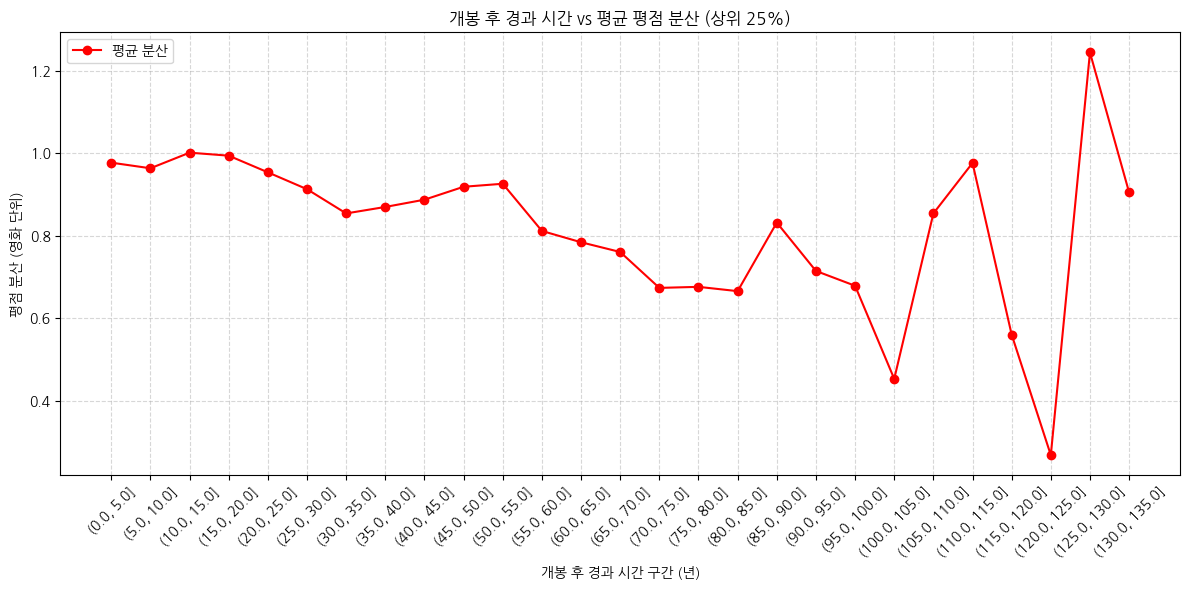

[0.90 Î∂ÑÏúÑÏàò Í∏∞Ï§Ä] ÏûÑÍ≥ÑÍ∞í=37, Î¶¨Î∑∞ Ìñâ=1,187,403, ÏòÅÌôî Ïàò=4,522


/tmp/ipython-input-1585253178.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = mv.groupby("age_bin")["var"].mean().reset_index()


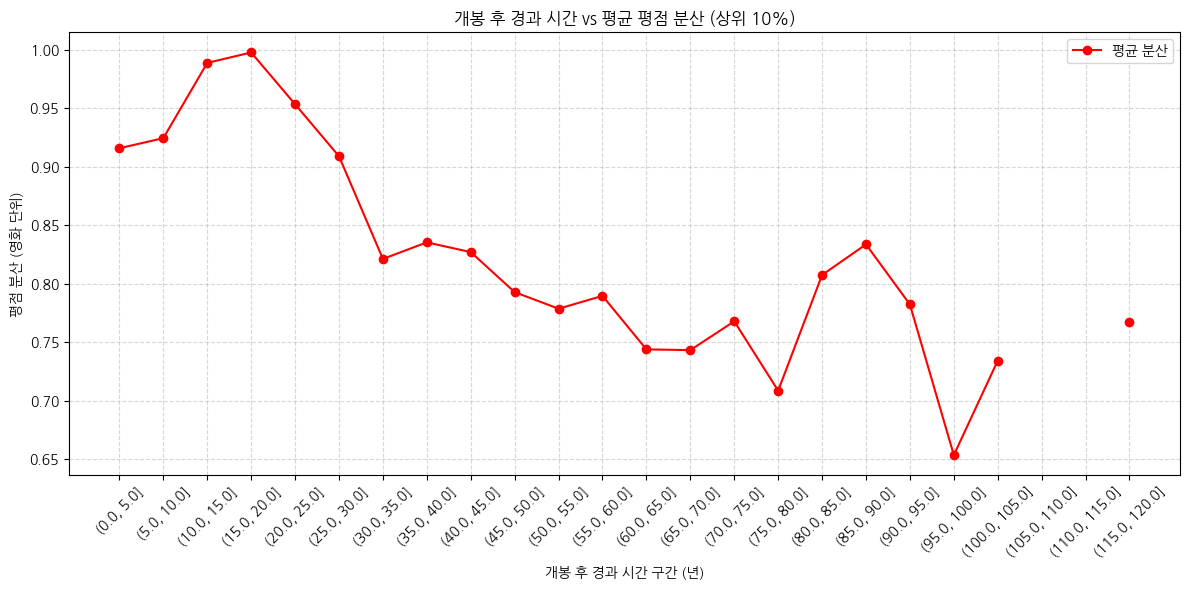

In [ ]:
# Î¶¨Î∑∞ Ïàò ÏÉÅÏúÑ 25% (75 Î∂ÑÏúÑÏàò Ïù¥ÏÉÅ ÏòÅÌôîÎßå Ìè¨Ìï®)
plot_overall_by_percentile(df, movie_counts, percentile=0.75, title_suffix="(ÏÉÅÏúÑ 25%)")

# Î¶¨Î∑∞ Ïàò ÏÉÅÏúÑ 10% (90 Î∂ÑÏúÑÏàò Ïù¥ÏÉÅ ÏòÅÌôîÎßå Ìè¨Ìï®)
plot_overall_by_percentile(df, movie_counts, percentile=0.90, title_suffix="(ÏÉÅÏúÑ 10%)")


[Ïû•Î•¥Î≥Ñ] 0.75 Î∂ÑÏúÑÏàò Í∏∞Ï§Ä ÏûÑÍ≥ÑÍ∞í=7, Î¶¨Î∑∞ Ìñâ=1,299,229, ÏòÅÌôî Ïàò=11,851


/tmp/ipython-input-402504217.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = mv.groupby("age_bin")["var"].mean().reset_index()
/tmp/ipython-input-402504217.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = mv.groupby("age_bin")["var"].mean().reset_index()
/tmp/ipython-input-402504217.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = mv.groupby("age_bin")["var"].mean().reset_index(

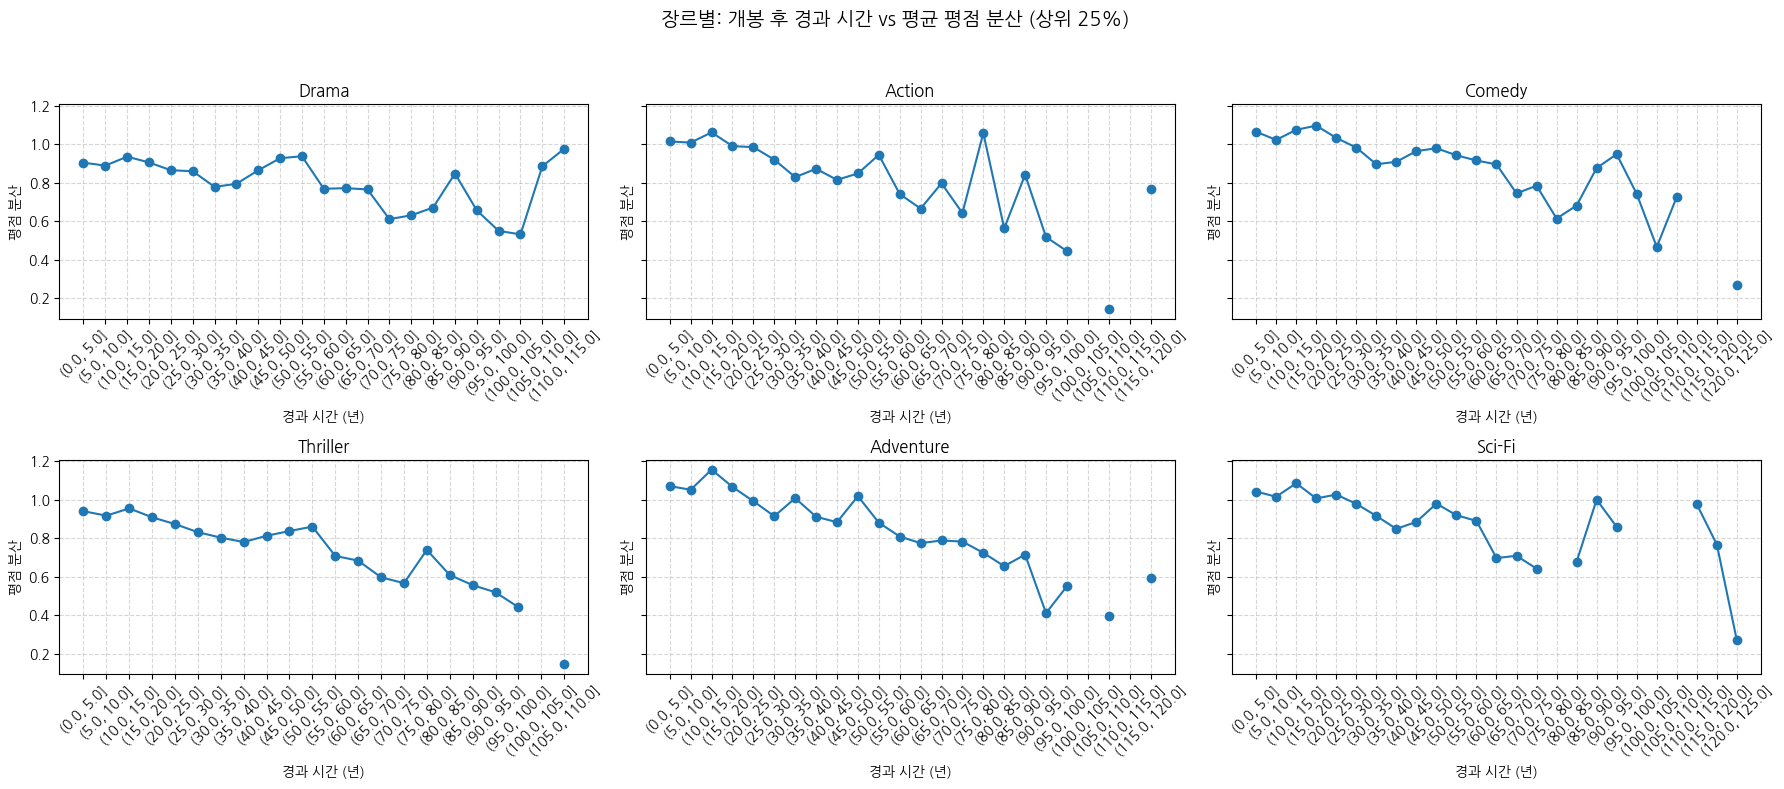

[Ïû•Î•¥Î≥Ñ] 0.90 Î∂ÑÏúÑÏàò Í∏∞Ï§Ä ÏûÑÍ≥ÑÍ∞í=37, Î¶¨Î∑∞ Ìñâ=1,187,403, ÏòÅÌôî Ïàò=4,522


/tmp/ipython-input-402504217.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = mv.groupby("age_bin")["var"].mean().reset_index()
/tmp/ipython-input-402504217.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = mv.groupby("age_bin")["var"].mean().reset_index()
/tmp/ipython-input-402504217.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_var = mv.groupby("age_bin")["var"].mean().reset_index(

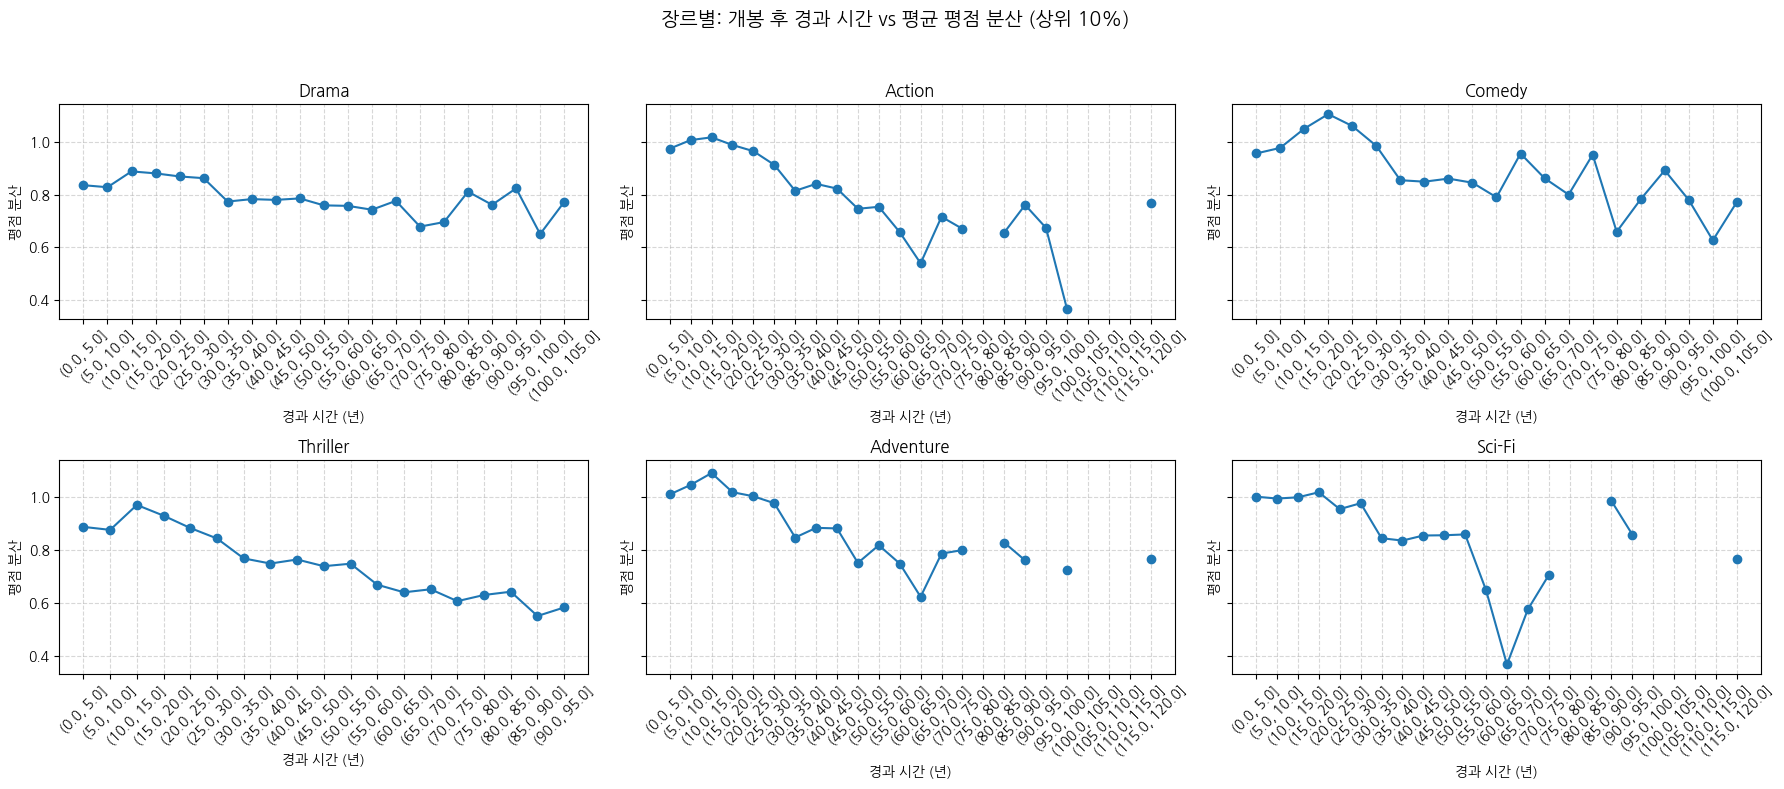

In [ ]:
target_genres = ["Drama","Action","Comedy","Thriller","Adventure","Sci-Fi"]

# ÏÉÅÏúÑ 25%
plot_by_genre_percentile(df, movie_counts, percentile=0.75,
                         target_genres=target_genres,
                         suptitle_suffix="(ÏÉÅÏúÑ 25%)")

# ÏÉÅÏúÑ 10%
plot_by_genre_percentile(df, movie_counts, percentile=0.90,
                         target_genres=target_genres,
                         suptitle_suffix="(ÏÉÅÏúÑ 10%)")


In [ ]:
import pandas as pd

# 1. movies.csv Î∂àÎü¨Ïò§Í∏∞
movies = pd.read_csv("movies.csv")
print("üé¨ movies.csv Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥")
print("Ìñâ(row) Ïàò:", movies.shape[0])
print("Ïó¥(column) Ïàò:", movies.shape[1])
print("\nÏª¨ÎüºÎ™Ö:", movies.columns.tolist())
print("\nÏïû 5Ìñâ:")
print(movies.head(), "\n")

# 2. ratings.csv Î∂àÎü¨Ïò§Í∏∞
ratings = pd.read_csv("ratings.csv")
print("‚≠ê ratings.csv Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥")
print("Ìñâ(row) Ïàò:", ratings.shape[0])
print("Ïó¥(column) Ïàò:", ratings.shape[1])
print("\nÏª¨ÎüºÎ™Ö:", ratings.columns.tolist())
print("\nÏïû 5Ìñâ:")
print(ratings.head(), "\n")

üé¨ movies.csv Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥
Ìñâ(row) Ïàò: 87585
Ïó¥(column) Ïàò: 3

Ïª¨ÎüºÎ™Ö: ['movieId', 'title', 'genres']

Ïïû 5Ìñâ:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   

‚≠ê ratings.csv Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥
Ìñâ(row) Ïàò: 32000204
Ïó¥(column) Ïàò: 4

Ïª¨ÎüºÎ™Ö: ['userId', 'movieId', 'rating', 'timestamp']

Ïïû 5Ìñâ:
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29  

In [ ]:
import pandas as pd

# 1. movies.csv Î∂àÎü¨Ïò§Í∏∞
movies = pd.read_csv("movies.csv")
print("üé¨ movies.csv Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥")
print("Ìñâ(row) Ïàò:", movies.shape[0])
print("Ïó¥(column) Ïàò:", movies.shape[1])
print("\nÏª¨ÎüºÎ™Ö:", movies.columns.tolist())

print("\nÏïû 5Ìñâ:")
print(movies.head())

print("\nÏÑ∏Î∂Ä info():")
print(movies.info())
print("="*80)

# 2. ratings.csv Î∂àÎü¨Ïò§Í∏∞
ratings = pd.read_csv("ratings.csv")
print("‚≠ê ratings.csv Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥")
print("Ìñâ(row) Ïàò:", ratings.shape[0])
print("Ïó¥(column) Ïàò:", ratings.shape[1])
print("\nÏª¨ÎüºÎ™Ö:", ratings.columns.tolist())

print("\nÏïû 5Ìñâ:")
print(ratings.head())

print("\nÏÑ∏Î∂Ä info():")
print(ratings.info())

üé¨ movies.csv Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥
Ìñâ(row) Ïàò: 87585
Ïó¥(column) Ïàò: 3

Ïª¨ÎüºÎ™Ö: ['movieId', 'title', 'genres']

Ïïû 5Ìñâ:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

ÏÑ∏Î∂Ä info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   ge